# Artigo 6 - Identificador de Derrame

## Autor
Nome: Danilo César Tertuliano Melo

Matrícula: 221031149

Github: DaniloCTM

----

## Objetivo

Este artigo busca criar uma árvore de decisão para identificar se a pessoa teve um derrame. Para isso foi utilizado o dataset stroke-prediction-dataset disponível no kaggle. 

# Passo 1 - Configurando o Ambiente

Inicialmente importamos as bibliotecas e definimos o caminho para o dataset que será utilizado.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
path = '/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv'

In [4]:
df = pd.read_csv(path)
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Passo 2 - Organizando o Dataset

Nem todas as linhas possuem o valor de bmi para resolver esse problema foi usado duas estratégias, na primeira os valores NaN foram subtituidos pela média da coluna bmi, já na segunda as linhas com valor NaN no bmi foram apagadas. A segunda estratégia foi a que apresentou o melhor resultado.

In [ ]:
# Código usado para substituir os valores - Não foi utilizado
mean_bmi = np.mean(df['bmi'])
df['bmi'] = df['bmi'].fillna(mean_bmi)

Para remover os valores NaN foi usado o dropna, nessa etapa também foi removido a coluna de id.

In [5]:
df = df.dropna(axis=0)
df = df.drop('id', axis=1)

In [6]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Em seguida definimos os dados categóricos. Para isso foi utilizado o pd.Categorical, essa função associa cada categoria a um valor inteiro.

In [7]:
df['gender'] = pd.Categorical(df.gender)
df['ever_married'] = pd.Categorical(df.ever_married)
df['Residence_type'] = pd.Categorical(df.Residence_type)
df['work_type'] = pd.Categorical(df.work_type)
df['smoking_status'] = pd.Categorical(df.smoking_status)

In [8]:
df.smoking_status.head()

0    formerly smoked
2       never smoked
3             smokes
4       never smoked
5    formerly smoked
Name: smoking_status, dtype: category
Categories (4, object): ['Unknown', 'formerly smoked', 'never smoked', 'smokes']

Olhando o data set os valores continuam sendo representados pela categorial. para ver o valor de forma inteira é necessário usar o df.coluna.cat.codes

In [9]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


Por meio do seguinte histograma é possível ver que a quantidade de casos de derrame está bem desbalanceado. A quantidade de dados de pessoas que não tiveram um derrame é consideravelmente maior.

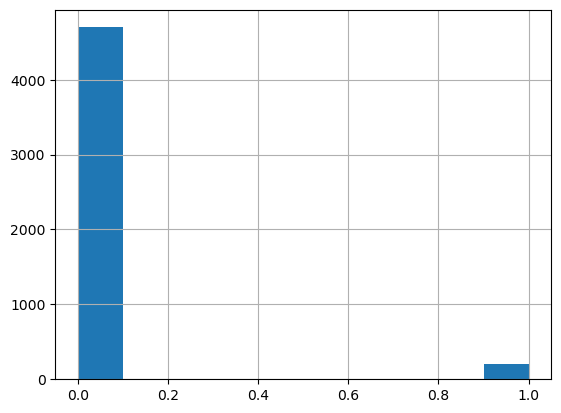

In [10]:
df.stroke.hist();

# Passo 3 - Dividindo o Dado

Primeiro dividimos os dados de teste de validação (75/25), para essa divisão foi utilizado o train_test_split do sklearn, essa divisão é feita de forma aleatória.

In [11]:
from sklearn.model_selection import train_test_split

trn_df,val_df = train_test_split(df, test_size=0.25)

Realizamos a criação dos histogramas dos dados de treinamento e dos dados de validação. Por meio desses gráficos é possível notar que os dados estão bem divididos (não há uma diferença grande entre eles).

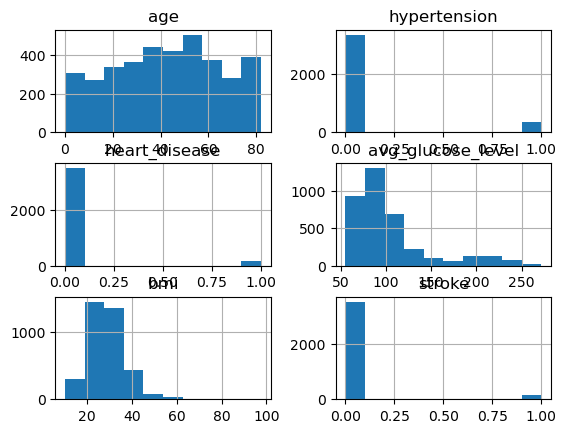

In [12]:
trn_df.hist();

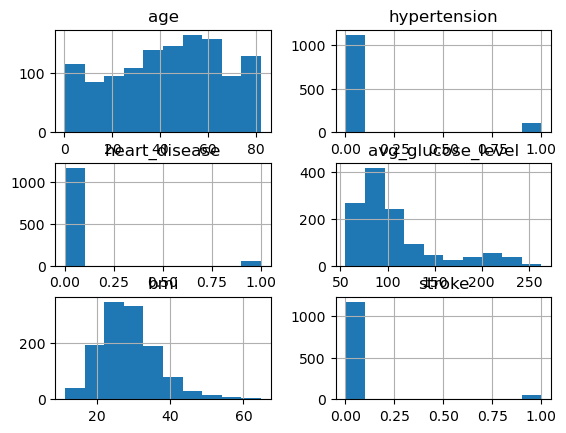

In [13]:
val_df.hist();

Definindo quais são os dados categoricos e quais são os dados contíuos

In [14]:
cats = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
conts = ["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi"]

Realizamos a substituição dos dados categoricos

In [15]:
trn_df[cats] = trn_df[cats].apply(lambda x: x.cat.codes)
val_df[cats] = val_df[cats].apply(lambda x: x.cat.codes)

In [16]:
trn_x = trn_df[cats+conts].copy()
trn_y = trn_df['stroke'].copy()

In [17]:
trn_x

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi
4775,1,1,0,1,2,42.0,0,0,58.35,24.3
3599,1,1,3,0,1,69.0,1,0,236.79,35.7
3927,0,1,2,1,0,62.0,0,0,88.32,36.3
3871,0,1,2,0,1,60.0,1,0,78.26,41.7
2091,1,0,4,1,0,11.0,0,0,124.35,32.7
...,...,...,...,...,...,...,...,...,...,...
252,0,1,2,0,1,70.0,0,0,69.04,35.9
2320,0,1,2,1,3,56.0,0,0,113.20,38.7
3237,0,1,2,1,2,36.0,0,0,91.34,29.9
941,1,1,0,1,2,60.0,0,0,100.54,30.1


In [18]:
trn_y

4775    0
3599    0
3927    0
3871    0
2091    0
       ..
252     0
2320    0
3237    0
941     0
1605    0
Name: stroke, Length: 3681, dtype: int64

# Passo 4 - Treinando o Modelo

Para esse modelo foi utilizado uma árvore de classificação, ela é criada com o comando ```DecisionTreeClassifier``` e recebe como parâmetro a quantidade de nós de folha. Para o treinamento é passado as variáveis independetes(trn_x) e as variáveis dependentes(trn_y).

In [19]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

m = DecisionTreeClassifier(max_depth = 3 ).fit(trn_x, trn_y);

Em seguida fazemos a representação gráfica da árvore, nela é possível ver a condição usada em cada nó, o gini (Métrica), o sample(quantidade de amostras), value(quantidade de amostras distribuidas para cada lado). Com a representação gráfica fica bem mais fácil entender como o modelo está funcionando.

In [20]:
import graphviz
import re

def draw_tree(t, df, size=10, ratio=0.6, precision=2, **kwargs):
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True, rounded=True,
                      special_characters=True, rotate=False, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', s))

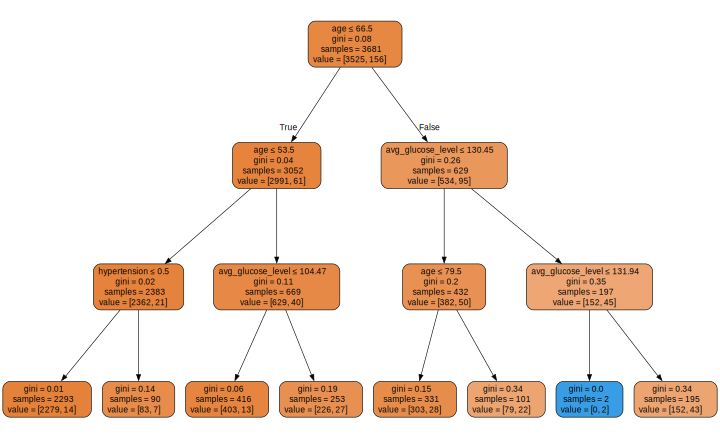

In [21]:
draw_tree(m, trn_x, size=10)

Para verificar a importancia de cada coluna no resultado do modelo basta usar o model.feature_importances_. Em foi criado um gráfico para expor a importância de cada coluna, por meio desse gráfico é possivel notar que muitos dados não foram utilizados nesse árvore.

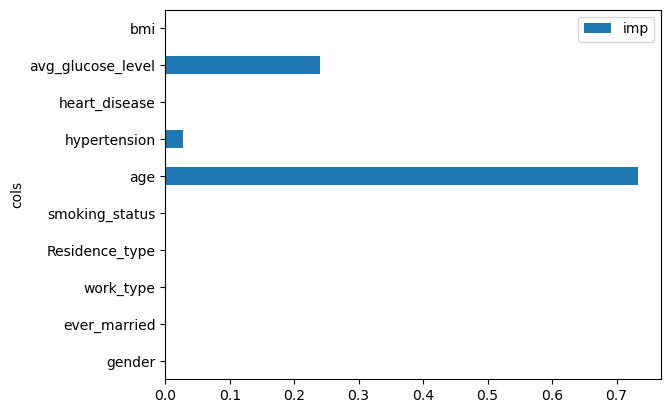

In [22]:
pd.DataFrame(dict(cols=trn_x.columns, imp=m.feature_importances_)).plot('cols', 'imp', 'barh');

# Entendendo a métrica gini

O atributo gini de um nó calcula sua impureza: um nó só é "puro" (gini = 0) se todas as instâncias de treinamento às quais ele se aplica peretencerem à mesma classe.

$$
G_{i} = 1 -\sum\limits_{k=1}^{n} = P_{i,k}^2
$$

Outra métrica usada no treinamento de árvores é a entropia, ela tem basicamente a mesma função que a gini, no entanto ela costuma gerar árvores mais equilibradas.

# Passo 5 - Validando o Modelo

Nessa etapa usamos a parte do dataset separado para a validação para criar as váriaveis dependentes.

In [23]:
tst_x = val_df[cats+conts].copy()
tst_y = val_df['stroke'].copy()

Realizamos a predição com .predict()

In [24]:
preds = m.predict(tst_x)

In [25]:
result = preds == tst_y
print(preds == tst_y)

4793     True
2332     True
2426     True
2093     True
1850     True
        ...  
3757     True
25      False
1158     True
2862     True
448      True
Name: stroke, Length: 1228, dtype: bool


In [26]:
error_qnt = result.value_counts()[False]
total = len(result)

Agora podemos ver a porcentagem de amostras que o classificador errou.

In [27]:
print(f'Erro de: {(error_qnt*100)/total}%')

Erro de: 4.397394136807818%


# Passo 6 - Fazendo Deploy do Modelo

O modelo pode ser acessado em https://huggingface.co/spaces/DaniloTertu/lesson-6

In [ ]:
import joblib

joblib.dump(m, 'tree_model.pkl')

# Conlusão
O modelo teve um bom desempenho obtendo apenas x% de erro na validação. Outro ponto interessante é que excluir os dados faltantes foi melhor que preencher com a média. Além disso, foi possível notar que usar o max_depth trouxe uma árvore mais balanceada que o max_leaf_nodes.